<a href="https://colab.research.google.com/github/tiara070403/skripsi/blob/main/Skripsi_tiaraaa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install re

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [ ]:
!pip install Sastrawi
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as pl

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import re
!pip install Sastrawi
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
import nltk
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk
!pip install re
import pandas as pd
import re
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
from transformers import pipeline

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_csv("/content/crawling.csv", index_col=0)
df.head()

,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
conversation_id_str,,,,,,,,,,,,,,
1858070162362204643,Sun Nov 17 08:50:22 +0000 2024,2,lucu banget mahasiswa pencinta alam ini,1858070162362204643,NaN,NaN,in,NaN,0,1,0,https://x.com/undefined/status/185807016236220...,1716269490936360960,NaN
1846529554657239219,Wed Oct 16 12:32:07 +0000 2024,0,Bejat Mahasiswa Pencinta Alam di Jambi 'Genjot...,1846529554657239219,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/184652955465723...,2544978158,NaN
1467691301155979267,Wed Oct 09 13:58:44 +0000 2024,0,@Leonita_Lestari Ada Perkoempoelan Pentjinta A...,1844014639350452258,NaN,Leonita_Lestari,in,NaN,0,0,0,https://x.com/undefined/status/184401463935045...,1810821796767375360,NaN
1836014724523458593,Tue Sep 17 12:09:56 +0000 2024,0,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...,1836014724523458593,https://pbs.twimg.com/media/GXrVp2Wa0AAv3zG.jpg,NaN,in,NaN,0,1,0,https://x.com/undefined/status/183601472452345...,297204645,NaN
1835164951125917967,Sun Sep 15 03:53:14 +0000 2024,0,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...,1835164951125917967,https://pbs.twimg.com/media/GXfQzAtacAAlymL.jpg,NaN,in,NaN,0,1,0,https://x.com/undefined/status/183516495112591...,297204645,NaN


In [ ]:
df.shape

(5349, 14)

In [ ]:
df = df[['created_at', 'full_text']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5349 entries, 1858070162362204643 to 1230765438897815552
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  5349 non-null   object
 1   full_text   5349 non-null   object
dtypes: object(2)
memory usage: 125.4+ KB


In [ ]:
df = df.drop_duplicates(subset=['full_text'])

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
created_at,0
full_text,0


In [ ]:
df

,created_at,full_text
conversation_id_str,,
1858070162362204643,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam ini
1846529554657239219,Wed Oct 16 12:32:07 +0000 2024,Bejat Mahasiswa Pencinta Alam di Jambi 'Genjot...
1467691301155979267,Wed Oct 09 13:58:44 +0000 2024,@Leonita_Lestari Ada Perkoempoelan Pentjinta A...
1836014724523458593,Tue Sep 17 12:09:56 +0000 2024,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...
1835164951125917967,Sun Sep 15 03:53:14 +0000 2024,[PRESS RELEASE SOWAN UKM KE UKM UNIT PANDU LIN...
...,...,...
1230768955653967873,Fri Feb 21 08:19:20 +0000 2020,Setiap orang di dunia ini bisa menjadi #BeTheH...
1230767649816100868,Fri Feb 21 08:14:08 +0000 2020,Kapolri: pelestarian lingkungan merupakan tang...
1230765718263586818,Fri Feb 21 08:06:28 +0000 2020,Pelestarian Lingkungan Merupakan Tanggung Jawa...


In [ ]:
df.shape

(5246, 2)

In [ ]:
# Case Folding
df['full_text'] = df['full_text'].str.lower()
df

,created_at,full_text
conversation_id_str,,
1858070162362204643,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam ini
1846529554657239219,Wed Oct 16 12:32:07 +0000 2024,bejat mahasiswa pencinta alam di jambi 'genjot...
1467691301155979267,Wed Oct 09 13:58:44 +0000 2024,@leonita_lestari ada perkoempoelan pentjinta a...
1836014724523458593,Tue Sep 17 12:09:56 +0000 2024,[press release sowan ukm ke ukm unit pandu lin...
1835164951125917967,Sun Sep 15 03:53:14 +0000 2024,[press release sowan ukm ke ukm unit pandu lin...
...,...,...
1230768955653967873,Fri Feb 21 08:19:20 +0000 2020,setiap orang di dunia ini bisa menjadi #betheh...
1230767649816100868,Fri Feb 21 08:14:08 +0000 2020,kapolri: pelestarian lingkungan merupakan tang...
1230765718263586818,Fri Feb 21 08:06:28 +0000 2020,pelestarian lingkungan merupakan tanggung jawa...


In [ ]:
df.shape

(5246, 2)

In [ ]:
# Cleaning
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)

  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)


In [ ]:
df

,created_at,full_text
conversation_id_str,,
1858070162362204643,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam ini
1846529554657239219,Wed Oct 16 12:32:07 +0000 2024,bejat mahasiswa pencinta alam di jambi genjot ...
1467691301155979267,Wed Oct 09 13:58:44 +0000 2024,ada perkoempoelan pentjinta alam yang lahir th...
1836014724523458593,Tue Sep 17 12:09:56 +0000 2024,press release sowan ukm ke ukm unit pandu ling...
1835164951125917967,Sun Sep 15 03:53:14 +0000 2024,press release sowan ukm ke ukm unit pandu ling...
...,...,...
1230768955653967873,Fri Feb 21 08:19:20 +0000 2020,setiap orang di dunia ini bisa menjadi untuk l...
1230767649816100868,Fri Feb 21 08:14:08 +0000 2020,kapolri pelestarian lingkungan merupakan tangg...
1230765718263586818,Fri Feb 21 08:06:28 +0000 2020,pelestarian lingkungan merupakan tanggung jawa...


In [ ]:
# Normalisasi Data
norm = {' mikir2 ':' mikir ', 'perkoempoelan':'perkumpulan', 'sowan':'menghadap', 'genjot':'menyerang', 'wkwkw':'hahaha', 'gtgtgt':'.', 'th':'tahun', 'ukamu':'ukm', 'bejat':'rusak', 'pentjinta':'pencinta', 'pecinta':'pencinta', ' siaaapp ':' siap ', 'okaaay ':'oke ', 'udh ':'sudah ','ga ':'tidak ',' gaskeun':' ayo ', 'wowww ':'wow ', ' haaayyuukkk ':' ayo ', ' yg ':' yang ', ' udh ':' udah ', 'wkwk ':' ', ' min ':' kak ', ' malem ':' malam', ' malem2 ':' malam ', ' sm ':' sama ', ' dy ':' dia ', ' lg ':' lagi ', ' skrg ':' sekarang ', ' ddpn ':' didepan ', ' makasi ':' makasih ', ' pertamaz ':' pertamax ', ' jg ':' juga ', ' donk ':' dong ', ' ikutann ':' ikutan ', ' banyakk ':' banyak ', ' twt ':' tweet', 'mantaap ':'mantap ', ' juarak':' juara ', 'daridulu ':'dari dulu ', 'siapp ':'siap ', ' gamau ':' tidak mau ', ' sll ':' selalu ', ' qu ':' aku ', ' krn ':' karena ', ' irii':' iri', ' muluu ':' terus ', 'mada ':'masa ', 'jgn ':'jangan ', ' jgn ':' jangan ', ' muluuu ':' terus ', 'ntar ':'nanti ', ' awtnya':' awetnya', 'gg ':'keren ', ' kerennn':' keren ', ' bisaa ':' bisa ', 'gaaa':'tidak ', " yg ": " yang ", ' nyampe':' sampai', ' nyampe ':' sampai ', ' lu ':' kamu ', ' ikhlaaasss ':' ikhlas ', ' gak ':' tidak ', ' klo ':' kalo ', ' amp ': ' sampai ', ' ga ':' tidak ', ' yaaaa':' ya ', 'betolll ':'betul ', ' kaga ':' tidak ', ' idk ':' tidak tahu ', ' jkt ':' jakarta ', ' lo ':' kamu ', ' bjir ':' ', ' kek ':' seperti ', ' yg ':' yang ', ' utk ':' untuk ', 'kismin ':'miskin ', ' kismin ':' miskin ', ' pd ':' pada ', ' dgn ':' dengan ', ' ituu ':' itu ', ' jg ':' juga ', 'yoi':'iya ', ' yoi ':' iya ', 'org2 ':'orang ', ' tak ':' tidak ', ' kyk ':' seperti ', ' sbg ':' sebagai ', ' anjjjj ':' ', ' bgt ':' banget ', 'km ':'kamu ', ' km ':' kamu', ' byk ':' banyak ', ' lg ':' lagi ', ' mrk ':' mereka ', ' blm ':' belum '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,created_at,full_text
conversation_id_str,,
1858070162362204643,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam ini
1846529554657239219,Wed Oct 16 12:32:07 +0000 2024,rusak mahasiswa pencinta alam di jambi menyera...
1467691301155979267,Wed Oct 09 13:58:44 +0000 2024,ada perkumpulan pencinta alam yang lahir tahun...
1836014724523458593,Tue Sep 17 12:09:56 +0000 2024,press release menghadap ukamu ke ukamu unit pa...
1835164951125917967,Sun Sep 15 03:53:14 +0000 2024,press release menghadap ukamu ke ukamu unit pa...
...,...,...
1230768955653967873,Fri Feb 21 08:19:20 +0000 2020,setiap orang di dunia ini bisa menjadi untuk l...
1230767649816100868,Fri Feb 21 08:14:08 +0000 2020,kapolri pelestarian lingkungan merupakan tangg...
1230765718263586818,Fri Feb 21 08:06:28 +0000 2020,pelestarian lingkungan merupakan tanggung jawa...


In [ ]:
# Stopwords Removal
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ['anjayyy']

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df

,created_at,full_text
conversation_id_str,,
1858070162362204643,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam
1846529554657239219,Wed Oct 16 12:32:07 +0000 2024,rusak mahasiswa pencinta alam jambi menyerang ...
1467691301155979267,Wed Oct 09 13:58:44 +0000 2024,perkumpulan pencinta alam lahir tahun 1953 did...
1836014724523458593,Tue Sep 17 12:09:56 +0000 2024,press release menghadap ukamu ukamu unit pandu...
1835164951125917967,Sun Sep 15 03:53:14 +0000 2024,press release menghadap ukamu ukamu unit pandu...
...,...,...
1230768955653967873,Fri Feb 21 08:19:20 +0000 2020,orang dunia bisa menjadi lingkungan sekitarnya...
1230767649816100868,Fri Feb 21 08:14:08 +0000 2020,kapolri pelestarian lingkungan merupakan tangg...
1230765718263586818,Fri Feb 21 08:06:28 +0000 2020,pelestarian lingkungan merupakan tanggung jawa...


In [ ]:
# Tokenisasi
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

,full_text
conversation_id_str,
1858070162362204643,"[lucu, banget, mahasiswa, pencinta, alam]"
1846529554657239219,"[rusak, mahasiswa, pencinta, alam, jambi, meny..."
1467691301155979267,"[perkumpulan, pencinta, alam, lahir, tahun, 19..."
1836014724523458593,"[press, release, menghadap, ukamu, ukamu, unit..."
1835164951125917967,"[press, release, menghadap, ukamu, ukamu, unit..."
...,...
1230768955653967873,"[orang, dunia, bisa, menjadi, lingkungan, seki..."
1230767649816100868,"[kapolri, pelestarian, lingkungan, merupakan, ..."
1230765718263586818,"[pelestarian, lingkungan, merupakan, tanggung,..."


In [ ]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)


lucu banget mahasiswa cinta alam
rusak mahasiswa cinta alam jambi serang paksa teman kampus rekam
kumpul cinta alam lahir tahun 1953 diri awibowo jutidak terbit majalah cinta alam sehingtidak istilah cinta alam familiar masyarakat jauh soe hok gie diri mahasiswa cinta alam univ indonesia


KeyboardInterrupt: 

In [ ]:
df.shape

(5246, 2)

In [ ]:
# Labeling
import pandas as pd

data_tweet = list(df['full_text'])

polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0


for i, tweet in enumerate(data_tweet):

  from textblob import TextBlob
  analysis = TextBlob(tweet)
  polaritas += analysis.polarity

  if analysis.sentiment.polarity > 0.0:
    total_positif += 1
    status.append('Positif')
  elif analysis.sentiment.polarity == 0.0:
    total_netral += 1
    status.append('Netral')
  else :
    total_negatif += 1
    status.append ('Negatif')

  total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data: {total}')

Hasil Analisis Data:
Positif = 281
Netral = 4852
Negatif = 113

Total Data: 5246


In [ ]:
df['klasifikasi'] = status
df

,created_at,full_text,klasifikasi
conversation_id_str,,,
1858070162362204643,Sun Nov 17 08:50:22 +0000 2024,lucu banget mahasiswa pencinta alam,Netral
1846529554657239219,Wed Oct 16 12:32:07 +0000 2024,rusak mahasiswa pencinta alam jambi menyerang ...,Netral
1467691301155979267,Wed Oct 09 13:58:44 +0000 2024,perkumpulan pencinta alam lahir tahun 1953 did...,Positif
1836014724523458593,Tue Sep 17 12:09:56 +0000 2024,press release menghadap ukamu ukamu unit pandu...,Netral
1835164951125917967,Sun Sep 15 03:53:14 +0000 2024,press release menghadap ukamu ukamu unit pandu...,Netral
...,...,...,...
1230768955653967873,Fri Feb 21 08:19:20 +0000 2020,orang dunia bisa menjadi lingkungan sekitarnya...,Netral
1230767649816100868,Fri Feb 21 08:14:08 +0000 2020,kapolri pelestarian lingkungan merupakan tangg...,Netral
1230765718263586818,Fri Feb 21 08:06:28 +0000 2020,pelestarian lingkungan merupakan tanggung jawa...,Netral


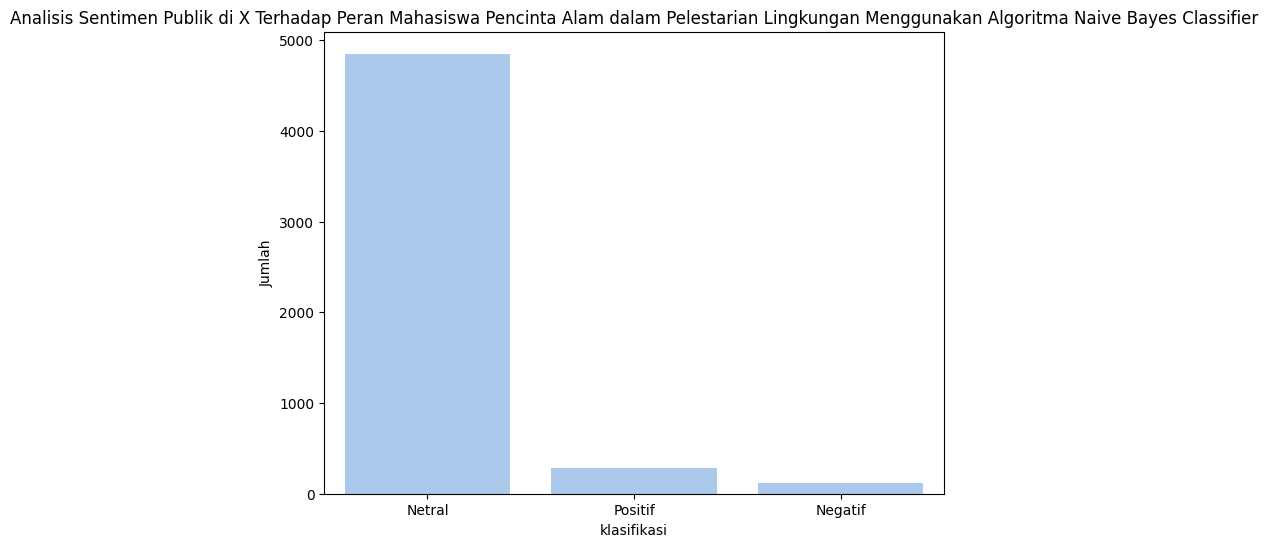

In [ ]:
# Visualisasi
sns.set_palette("pastel")
plt.figure(figsize=(8, 6))
sns.countplot(x='klasifikasi', data=df)
plt.title('Analisis Sentimen Publik di X Terhadap Peran Mahasiswa Pencinta Alam dalam Pelestarian Lingkungan Menggunakan Algoritma Naive Bayes Classifier')
plt.xlabel('klasifikasi')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
data_negatif = df[df['klasifikasi'] == 'Negatif']
data_positif = df[df['klasifikasi'] == 'Positif']
data_netral = df[df['klasifikasi'] == 'Netral']

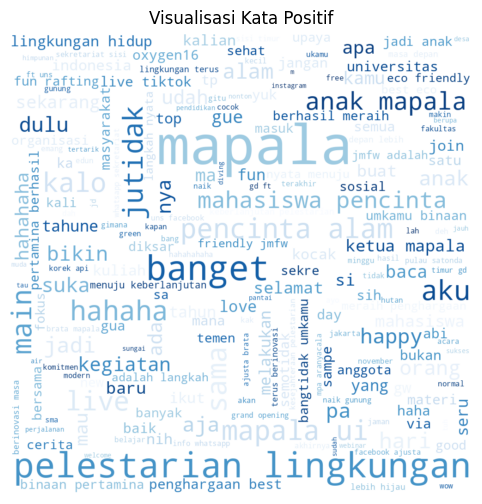

In [ ]:
all_text_s1 = ' '.join(word for word in data_positif["full_text"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

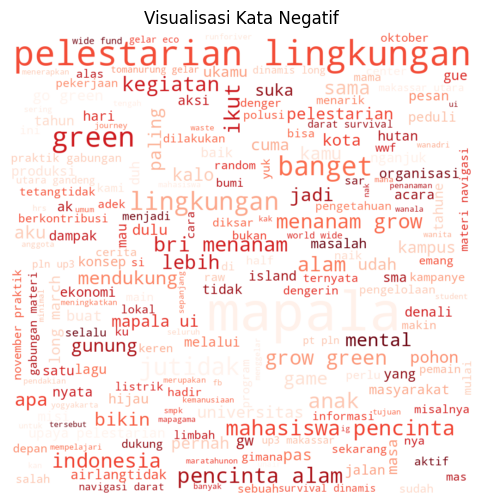

In [ ]:
all_text_s0 = ' '.join(word for word in data_negatif["full_text"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

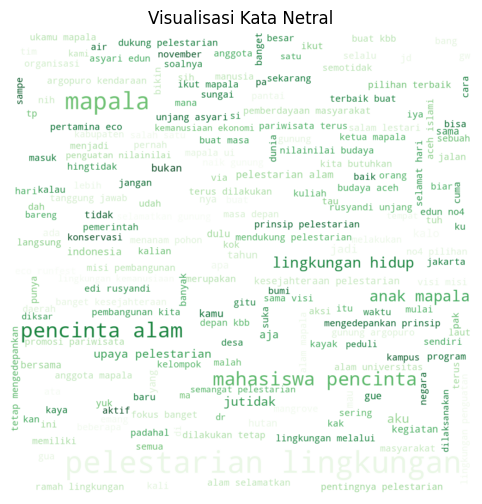

In [ ]:
all_text_s2 = ' '.join(word for word in data_netral["full_text"])
wordcloud = WordCloud(colormap='Greens', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s2)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Netral")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
# Labeling
data_tweet = list(df['full_text'])

polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0


for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet, classifier=cl)

  if analysis.classify() == 'Positif':
    total_positif += 1
  elif analysis.classify() == 'Netral':
    total_netral += 1
  else :
    total_negatif += 1

  status.append(analysis.classify())
  total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data: {total}')

In [ ]:
# SPLITING DATA
X=df.full_text
y=df.klasifikasi

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 4196
Banyak data x_test  : 1050
Banyak data y_train : 4196
Banyak data y_test  : 1050


In [ ]:
# TRAINING DATA
cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf1 = MultinomialNB()

In [ ]:
model1 = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf1)])

In [ ]:
model1.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [ ]:
hasil1=model1.predict(x_test)

In [ ]:
matrix = classification_report(y_test,hasil1)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00        20
      Netral       0.92      1.00      0.96       968
     Positif       0.00      0.00      0.00        62

    accuracy                           0.92      1050
   macro avg       0.31      0.33      0.32      1050
weighted avg       0.85      0.92      0.88      1050



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Testing
def classify_text(input_text):
    models = [
        ('MultinomialNB', model_multinomialNaiveBayes)
    ]

    results = {}

    for name, model in models:
        prediction = model.predict([input_text])
        results[name] = prediction[0]

    return results

In [ ]:
model_multinomialNaiveBayes = model1.fit(x_train, y_train)

In [ ]:
input_text = input("Masukkan teks yang ingin diklasifikasikan: ")

results = classify_text(input_text)

print("Input kata :", input_text)

print("\nHasil Klasifikasi:")
for model, prediction in results.items():
    print(f"{model}: {prediction}")